In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import pickle
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
TESS = "/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/"
# Run one example 
dir_list = os.listdir(TESS)
dir_list[0:5]

['YAF_fear', 'YAF_neutral', 'YAF_angry', 'OAF_Sad', 'OAF_neutral']

In [4]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('Female_Angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('Female_Disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('Female_Fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('Female_Happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('Female_Neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('Female_Surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('Female_Sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)
        TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

Female_Surprise    400
Female_Sad         400
Female_Happy       400
Female_Disgust     400
Female_Neutral     400
Female_Fear        400
Female_Angry       400
Name: labels, dtype: int64

In [5]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'Anger', 2:'Disgust', 3:'Fear', 4:'Happy', 5:'Neutral', 6:'Sad', 7:'Surprise'})
audio_df.columns = ['emotion']
audio_df = pd.concat([audio_df,pd.DataFrame(path, columns = ['path'])],axis=1)
audio_df

,emotion,path
0,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis...
1,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis...
2,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis...
3,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis...
4,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis...
...,...,...
2795,Female_Happy,/content/drive/MyDrive/Speech Emotion analysis...
2796,Female_Happy,/content/drive/MyDrive/Speech Emotion analysis...
2797,Female_Happy,/content/drive/MyDrive/Speech Emotion analysis...
2798,Female_Happy,/content/drive/MyDrive/Speech Emotion analysis...


In [6]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)
audio_df.sample(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,emotion,path
1636,Female_Sad,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_sad/YAF_deep_sad.wav
2265,Female_Disgust,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_disgust/OAF_gun_disgust.wav
190,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_voice_fear.wav
1418,Female_Happy,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_happy/YAF_ripe_happy.wav
2053,Female_Fear,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_Fear/OAF_wag_fear.wav
...,...,...
658,Female_Sad,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_Sad/OAF_dab_sad.wav
1920,Female_Surprise,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_chief_ps.wav
1926,Female_Surprise,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_talk_ps.wav
1297,Female_Disgust,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_disgust/YAF_third_disgust.wav


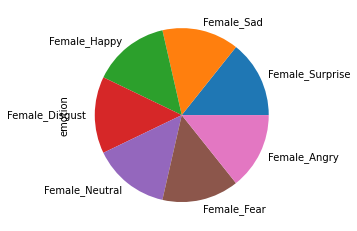

In [7]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='pie') 

In [8]:
df = pd.concat([TESS_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

Female_Surprise    400
Female_Sad         400
Female_Happy       400
Female_Disgust     400
Female_Neutral     400
Female_Fear        400
Female_Angry       400
Name: labels, dtype: int64


In [9]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("./Data_path.csv")
ref.head(3)

,labels,source,path
0,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_have_fear.wav
1,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav
2,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_hole_fear.wav


In [ ]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['mfcc'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=1.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=20),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

2800


,mfcc
0,"[-21.10178, -20.970684, -23.21652, -18.44469, -18.20002, -22.025625, -25.088661, -28.16973, -26.95477, -26.580538, -26.91221, -26.14405, -23.049955, -22.279377, -24.656532, -26.653727, -24.920637, -24.119112, -23.62378, -23.173706, -24.300772, -24.860945, -21.27294, -19.972532, -21.836977, -24.1478, -24.800251, -25.291494, -25.059292, -27.64037, -26.409445, -25.174263, -26.157377, -26.114208, -28.644863, -26.824862, -25.098864, -25.427998, -27.540783, -30.068422, -28.409523, -26.175646, -21.21865, -17.080046, -20.086266, -23.173597, -21.077885, -23.017397, -22.93373, -22.566355, -24.195274, -25.648296, -24.297611, -24.828157, -24.306393, -26.712984, -30.329546, -29.635454, -24.979296, -21.772522, -21.920166, -23.277039, -23.954449, -23.641142, -26.601074, -28.47422, -27.545544, -26.710672, -25.962973, -27.187513, -26.535763, -27.87515, -28.18436, -26.187784, -27.722807, -26.70819, -27.106998, -28.396132, -24.559092, -23.214958, -24.04291, -25.46871, -26.701225, -27.542347, -27.85587, -28.338491, -25.396706, -23.104004, -24.018097, -23.473207, -23.733276, -23.775759, -24.070036, -24.923948, -26.175852, -26.588032, -24.20457, -23.89232, -26.848848, -26.802795, ...]"
1,"[-10.550032, -14.714083, -22.29504, -22.898052, -21.560883, -17.394014, -18.550844, -19.787642, -20.568031, -24.176323, -26.27634, -25.674696, -26.643501, -27.360289, -27.152407, -24.437054, -19.736574, -12.0769205, -9.205, -9.602368, -12.938654, -15.3699665, -18.389578, -19.857439, -23.1756, -25.886732, -26.13788, -23.709179, -25.74948, -27.488192, -28.465328, -28.547062, -26.115093, -25.952248, -25.55173, -20.625244, -21.362871, -26.148283, -21.584639, -17.49364, -20.291225, -28.315462, -30.055397, -29.218538, -28.966982, -32.265762, -31.858412, -30.078836, -26.27322, -23.611818, -20.97122, -21.237751, -24.113758, -26.133755, -28.60807, -29.79647, -30.01821, -29.213545, -29.728523, -30.779198, -32.24609, -31.554615, -32.196236, -31.358227, -31.296389, -30.205822, -33.18562, -32.37314, -32.220917, -33.847385, -32.90233, -32.403038, -34.33283, -32.537045, -31.639433, -30.441616, -29.161587, -28.729641, -26.648195, -22.819542, -25.625154, -28.15339, -29.369783, -25.430363, -24.764757, -24.331993, -24.897078, -27.312275, -23.39974, -22.20033, -21.395596, -16.915264, -14.456832, -15.701985, -16.946093, -19.545212, -15.659415, -14.082031, -13.647314, -13.531877, ...]"
2,"[-8.977513, -12.652449, -21.676195, -20.939444, -20.532085, -21.706612, -24.066694, -20.822502, -18.255186, -22.020052, -25.5164, -27.486042, -27.97742, -27.661865, -24.937782, -23.988773, -25.894987, -25.467731, -24.9769, -25.109394, -26.157524, -26.563673, -22.637821, -17.25255, -16.41137, -19.342285, -22.984035, -24.399973, -24.508158, -24.142933, -22.410997, -22.284515, -23.648994, -24.504784, -24.268917, -25.893137, -23.6227, -20.141783, -17.017914, -17.57732, -19.95176, -20.045406, -18.950289, -15.835624, -15.494905, -19.168772, -21.325748, -20.113924, -16.464172, -8.623697, -4.683207, -1.5938675, 0.36501354, 0.08693365, -0.64634144, -2.6139865, -4.992647, -4.6181035, -5.39181, -9.428446, -10.546107, -14.06504, -14.808068, -14.922623, -16.72978, -18.656008, -20.219051, -21.451855, -21.839396, -21.706625, -21.900423, -23.526058, -25.414114, -25.908947, -28.143484, -30.484123, -29.60161, -29.835663, -29.913662, -29.934998, -30.993492, -30.12142, -29.130613, -29.626966, -29.337841, -33.78306, -33.601376, -28.294136, -26.11993, -28.809652, -29.441433, -29.557625, -28.866953, -28.276009, -27.002232, -27.397205, -29.922447, -28.709724, -28.85305, -27.815388, ...]"
3,"[-7.432144, -8.827226, -6.1389813, -2.1561167, 2.1714978, 2.929305, 2.500369, -0.2161183, -6.0562334, -8.202143, -9.228257, -13.110254, -19.992378, -22.610033, -24.249393, -24.600859, -25.378544, -26.229074, -26.796202, -26.207674, -21.367107, -22.121286, -20.938225, -20.227478, -19.710217, -16.341957, -14.941712, -13.910646, -14.014164, -15.495463, -17.020506, -14.9662285, -14.880589, -15.9231205, -13.793132, -14.958277, -15.482

In [20]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.6
                                 )
    sample_rate = np.array(sample_rate)
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=X).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

2800


,Features
0,"[0.0728916266025641, 0.664783775806427, 0.4712405204772949, 0.38488656282424927, 0.4493650197982788, 0.5371460318565369, 0.5775800347328186, 0.472752183675766, 0.4040723741054535, 0.39691218733787537, 0.4096214473247528, 0.4537789523601532, 0.5975416898727417, -382.6442565917969, 119.76947784423828, -67.83574676513672, 29.178604125976562, -20.47992706298828, -0.7771507501602173, 8.46515941619873, -1.2991969585418701, 9.928253173828125, -18.450580596923828, 11.062501907348633, 6.86448335647583, -14.157936096191406, 0.04071968048810959, 0.08207567781209946, 0.028903000056743622, 0.014345811679959297, 0.008425622247159481, 0.005502806976437569, 0.004676063545048237, 0.0053949556313455105, 0.03522456809878349, 0.7217052578926086, 3.4396116733551025, 4.787580490112305, 1.2996578216552734, 0.17570368945598602, 0.12419729679822922, 0.23422902822494507, 0.10132957994937897, 0.02258262224495411, 0.13272857666015625, 1.3805274963378906, 5.240850925445557, 4.095280647277832, 3.050302267074585, 1.8331962823867798, 0.4244183599948883, 0.20262478291988373, 0.09910739958286285, 0.1796846091747284, 0.2878928780555725, 0.6678274273872375, 1.8270217180252075, 1.478008508682251, 2.259909152984619, 6.0454864501953125, 8.740638732910156, 1.150638461112976, 0.4467386305332184, 0.22361935675144196, 0.21166637539863586, 0.39062437415122986, 0.2795005440711975, 0.3272000253200531, 0.5258481502532959, 0.6727403402328491, 0.20957067608833313, 0.17487050592899323, 0.20978817343711853, 0.20792603492736816, 0.45376136898994446, 0.9928082227706909, 1.3386234045028687, 0.3011641800403595, 0.2326539158821106, 0.07782038301229477, 0.09792330861091614, 0.21303346753120422, 0.09539969265460968, 0.02725301682949066, 0.019081812351942062, 0.016994692385196686, 0.03438974916934967, 0.027822420001029968, 0.02690817229449749, 0.02128356322646141, 0.11604656279087067, 0.09693428128957748, 0.03819001093506813, 0.03917244076728821, 0.036099523305892944, 0.02202250249683857, 0.012298415414988995, 0.01473039761185646, 0.01691771112382412, 0.02783486247062683, ...]"
1,"[0.03695354055851064, 0.40840944647789, 0.4429566264152527, 0.3699299395084381, 0.42530006170272827, 0.4575020670890808, 0.49999597668647766, 0.5904908776283264, 0.4833475351333618, 0.33010774850845337, 0.27371206879615784, 0.33842459321022034, 0.3654407858848572, -390.3827819824219, 126.98047637939453, -47.98588562011719, 40.75765609741211, -9.241435050964355, 3.0819942951202393, 3.616823196411133, -6.8278093338012695, 2.689359188079834, -27.441936492919922, 2.206717014312744, -0.27523699402809143, -15.415549278259277, 0.0444847010076046, 0.521182656288147, 0.22716984152793884, 0.07075300067663193, 0.03895566985011101, 0.028883742168545723, 0.03438066318631172, 0.08267232030630112, 0.6153023838996887, 2.937481164932251, 5.653047561645508, 9.71238899230957, 12.350479125976562, 2.9604580402374268, 0.13084103167057037, 0.017527664080262184, 0.06376887112855911, 0.43242567777633667, 0.9481934309005737, 3.69289231300354, 7.865663528442383, 1.520344853401184, 0.2778331935405731, 1.17964768409729, 1.1737860441207886, 0.31795987486839294, 0.07506757229566574, 0.10431654006242752, 0.043931376188993454, 0.3240855932235718, 0.9616082310676575, 0.4368039667606354, 0.13886375725269318, 0.05808773264288902, 0.2682788670063019, 0.3613532483577728, 0.17894572019577026, 0.023410094901919365, 0.07128170877695084, 0.20769906044006348, 0.09321757405996323, 0.025598296895623207, 0.022924372926354408, 0.0824427679181099, 0.31075558066368103, 0.7643843293190002, 1.1775479316711426, 0.5774763226509094, 0.2857787013053894, 0.16082225739955902, 0.1755971759557724, 0.42315003275871277, 0.17167747020721436, 0.07206207513809204, 0.06504037231206894, 0.052179913967847824, 0.06158360466361046, 0.012584419921040535, 0.006894855294376612, 0.0018560177413746715, 0.0027744569815695286, 0.007289933506399393, 0.0457434244453907, 0.02924029715359211, 0.005809204187244177, 0.01817680336534977, 0.013257318176329136, 0.006443477701395

In [21]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
0,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_have_fear.wav,0.072892,0.664784,0.471241,0.384887,0.449365,0.537146,0.577580,0.472752,0.404072,0.396912,0.409621,0.453779,0.597542,-382.644257,119.769478,-67.835747,29.178604,-20.479927,-0.777151,8.465159,-1.299197,9.928253,-18.450581,11.062502,6.864483,-14.157936,0.040720,0.082076,0.028903,0.014346,0.008426,0.005503,0.004676,0.005395,0.035225,0.721705,3.439612,...,0.004917,0.004923,0.002687,0.001661,0.001068,0.001449,0.001821,0.001477,0.001027,0.001121,0.000733,0.000837,0.000786,0.000567,0.000449,0.000294,0.000083,0.000028,0.000008,0.000002,5.349415e-07,2.694647e-07,2.257464e-07,1.955897e-07,1.712025e-07,1.512272e-07,1.346578e-07,1.203950e-07,1.091340e-07,9.914004e-08,9.080561e-08,8.364672e-08,7.760747e-08,7.240006e-08,6.844874e-08,6.548698e-08,6.214199e-08,6.068787e-08,5.953495e-08,5.780354e-08
1,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav,0.036954,0.408409,0.442957,0.369930,0.425300,0.457502,0.499996,0.590491,0.483348,0.330108,0.273712,0.338425,0.365441,-390.382782,126.980476,-47.985886,40.757656,-9.241435,3.081994,3.616823,-6.827809,2.689359,-27.441936,2.206717,-0.275237,-15.415549,0.044485,0.521183,0.227170,0.070753,0.038956,0.028884,0.034381,0.082672,0.615302,2.937481,5.653048,...,0.001103,0.001224,0.001225,0.000706,0.000877,0.001072,0.001544,0.001267,0.001491,0.000930,0.000412,0.000403,0.001011,0.001994,0.001706,0.000207,0.000028,0.000019,0.000009,0.000003,1.621532e-06,1.165519e-06,9.824848e-07,8.362788e-07,7.219070e-07,6.302689e-07,5.557445e-07,4.926962e-07,4.428520e-07,3.994360e-07,3.628062e-07,3.330610e-07,3.076050e-07,2.862839e-07,2.684995e-07,2.556311e-07,2.432435e-07,2.356836e-07,2.266230e-07,2.227243e-07
2,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_hole_fear.wav,0.052798,0.660350,0.549982,0.437358,0.461046,0.494419,0.518103,0.491013,0.438330,0.377210,0.322179,0.364723,0.529521,-382.138702,127.892342,-40.116772,41.927002,-21.441433,-16.703156,6.611582,3.433076,10.501930,-19.409153,4.962169,5.389168,-16.354305,0.046312,1.925384,1.661654,1.166346,0.578461,0.241202,0.083098,0.149535,0.607954,2.602099,3.801054,...,0.001983,0.002113,0.002307,0.001824,0.001406,0.001816,0.001405,0.001489,0.001731,0.001380,0.000669,0.000730,0.000698,0.000423,0.000227,0.000099,0.000048,0.000014,0.000004,0.000001,4.847078e-07,3.082800e-07,2.620365e-07,2.264632e-07,1.981453e-07,1.751124e-07,1.557219e-07,1.397999e-07,1.262582e-07,1.148010e-07,1.049672e-07,9.675647e-08,8.983966e-08,8.385543e-08,7.918552e-08,7.614275e-08,7.310597e-08,7.008841e-08,6.809797e-08,6.623219e-08
3,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav,0.071222,0.446119,0.428325,0.475662,0.501992,0.582337,0.599778,0.566079,0.493839,0.367724,0.306321,0.297943,0.413971,-299.361877,118.184799,-61.871902,40.271919,-19.702209,-8.990031,-2.800597,-14.204879,-0.290038,-25.018114,-0.748428,-1.652166,-12.263057,0.107905,0.086047,0.047935,0.096679,0.090267,0.059465,0.071013,0.077451,0.127000,7.436472,20.126064,...,0.178981,0.139524,0.099841,0.073277,0.098164,0.088541,0.067049,0.066876,0.050758,0.030370,0.025860,0.026437,0.021591,0.013074,0.009084,0.004613,0.001215,0.000371,0.000107,0.000021,5.951436e-06,2.956709e-06,2.404275e-06,2.085115e-06,1.827541e-06,1.618452e-06,1.444848e-06,1.290900e-06,1.175678e-06,1.070784e-06,9.802818e-07,9.052793e-07,8.408246e-07,7.883631e-07,7.435364e-07,7.126932e-07,6.712415

In [22]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(2800, 158)


,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
0,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_have_fear.wav,0.072892,0.664784,0.471241,0.384887,0.449365,0.537146,0.577580,0.472752,0.404072,0.396912,0.409621,0.453779,0.597542,-382.644257,119.769478,-67.835747,29.178604,-20.479927,-0.777151,8.465159,-1.299197,9.928253,-18.450581,11.062502,6.864483,-14.157936,0.040720,0.082076,0.028903,0.014346,0.008426,0.005503,0.004676,0.005395,0.035225,0.721705,3.439612,...,0.004917,0.004923,0.002687,0.001661,0.001068,0.001449,0.001821,0.001477,0.001027,0.001121,0.000733,0.000837,0.000786,0.000567,0.000449,0.000294,0.000083,0.000028,0.000008,0.000002,5.349415e-07,2.694647e-07,2.257464e-07,1.955897e-07,1.712025e-07,1.512272e-07,1.346578e-07,1.203950e-07,1.091340e-07,9.914004e-08,9.080561e-08,8.364672e-08,7.760747e-08,7.240006e-08,6.844874e-08,6.548698e-08,6.214199e-08,6.068787e-08,5.953495e-08,5.780354e-08
1,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav,0.036954,0.408409,0.442957,0.369930,0.425300,0.457502,0.499996,0.590491,0.483348,0.330108,0.273712,0.338425,0.365441,-390.382782,126.980476,-47.985886,40.757656,-9.241435,3.081994,3.616823,-6.827809,2.689359,-27.441936,2.206717,-0.275237,-15.415549,0.044485,0.521183,0.227170,0.070753,0.038956,0.028884,0.034381,0.082672,0.615302,2.937481,5.653048,...,0.001103,0.001224,0.001225,0.000706,0.000877,0.001072,0.001544,0.001267,0.001491,0.000930,0.000412,0.000403,0.001011,0.001994,0.001706,0.000207,0.000028,0.000019,0.000009,0.000003,1.621532e-06,1.165519e-06,9.824848e-07,8.362788e-07,7.219070e-07,6.302689e-07,5.557445e-07,4.926962e-07,4.428520e-07,3.994360e-07,3.628062e-07,3.330610e-07,3.076050e-07,2.862839e-07,2.684995e-07,2.556311e-07,2.432435e-07,2.356836e-07,2.266230e-07,2.227243e-07
2,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_hole_fear.wav,0.052798,0.660350,0.549982,0.437358,0.461046,0.494419,0.518103,0.491013,0.438330,0.377210,0.322179,0.364723,0.529521,-382.138702,127.892342,-40.116772,41.927002,-21.441433,-16.703156,6.611582,3.433076,10.501930,-19.409153,4.962169,5.389168,-16.354305,0.046312,1.925384,1.661654,1.166346,0.578461,0.241202,0.083098,0.149535,0.607954,2.602099,3.801054,...,0.001983,0.002113,0.002307,0.001824,0.001406,0.001816,0.001405,0.001489,0.001731,0.001380,0.000669,0.000730,0.000698,0.000423,0.000227,0.000099,0.000048,0.000014,0.000004,0.000001,4.847078e-07,3.082800e-07,2.620365e-07,2.264632e-07,1.981453e-07,1.751124e-07,1.557219e-07,1.397999e-07,1.262582e-07,1.148010e-07,1.049672e-07,9.675647e-08,8.983966e-08,8.385543e-08,7.918552e-08,7.614275e-08,7.310597e-08,7.008841e-08,6.809797e-08,6.623219e-08
3,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav,0.071222,0.446119,0.428325,0.475662,0.501992,0.582337,0.599778,0.566079,0.493839,0.367724,0.306321,0.297943,0.413971,-299.361877,118.184799,-61.871902,40.271919,-19.702209,-8.990031,-2.800597,-14.204879,-0.290038,-25.018114,-0.748428,-1.652166,-12.263057,0.107905,0.086047,0.047935,0.096679,0.090267,0.059465,0.071013,0.077451,0.127000,7.436472,20.126064,...,0.178981,0.139524,0.099841,0.073277,0.098164,0.088541,0.067049,0.066876,0.050758,0.030370,0.025860,0.026437,0.021591,0.013074,0.009084,0.004613,0.001215,0.000371,0.000107,0.000021,5.951436e-06,2.956709e-06,2.404275e-06,2.085115e-06,1.827541e-06,1.618452e-06,1.444848e-06,1.290900e-06,1.175678e-06,1.070784e-06,9.802818e-07,9.052793e-07,8.408246e-07,7.883631e-07,7.435364e-07,7.126932e-07,6.712415

In [23]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154
2241,0.032806,0.522537,0.521897,0.525532,0.547578,0.626790,0.726383,0.682110,0.578389,0.456073,0.422705,0.419823,0.464948,-495.014923,146.053696,10.078044,23.797155,-22.727575,14.457826,6.438513,-8.180792,13.897537,-14.424209,-2.629963,0.273760,-5.458818,0.019373,0.463270,0.053861,0.007689,0.036697,0.381317,0.644606,0.349767,0.053761,0.030626,0.158732,0.976396,1.491269,0.900979,...,0.000284,0.000168,0.000077,0.000093,0.000141,0.000210,0.000298,0.000387,0.000346,0.000207,0.000113,0.000115,0.000084,0.000079,0.000062,0.000032,0.000010,0.000005,2.305800e-06,5.395944e-07,1.098342e-07,3.038016e-08,2.160588e-08,1.834483e-08,1.600948e-08,1.412147e-08,1.261777e-08,1.124742e-08,1.023047e-08,9.244346e-09,8.446784e-09,7.771408e-09,7.201823e-09,6.744921e-09,6.379436e-09,6.278925e-09,5.989215e-09,5.930527e-09,5.597637e-09,5.293713e-09
25,0.097988,0.589831,0.589639,0.542693,0.456705,0.469653,0.511217,0.573337,0.557025,0.464321,0.445574,0.470835,0.495392,-397.056091,94.843636,-49.275467,44.008591,-4.736695,-2.345354,0.041395,-6.573420,7.484782,-16.442581,4.991943,2.570002,-12.481050,0.040562,0.018923,0.007723,0.007677,0.008669,0.010032,0.011585,0.052869,0.429658,1.979343,2.614087,4.486291,6.620696,2.246716,...,0.020101,0.021849,0.014908,0.017251,0.018093,0.014308,0.008842,0.007310,0.005626,0.004826,0.003175,0.002276,0.003271,0.002880,0.001368,0.000648,0.000255,0.000163,5.872499e-05,9.966177e-06,1.111117e-06,9.001587e-08,3.477811e-08,2.958796e-08,2.556231e-08,2.245196e-08,1.968813e-08,1.770509e-08,1.576013e-08,1.447396e-08,1.303608e-08,1.207553e-08,1.111339e-08,1.033767e-08,9.796659e-09,1.034887e-08,9.917104e-09,9.388724e-09,8.519010e-09,8.601338e-09
840,0.032084,0.345203,0.475014,0.403934,0.340528,0.454362,0.691959,0.870585,0.657636,0.418360,0.320206,0.339886,0.295817,-563.403625,135.577545,8.937169,34.283031,-10.920714,22.498802,8.659645,-8.125790,5.344228,-17.473057,4.791620,-1.055663,-6.882711,0.010883,0.013054,0.001247,0.000189,0.005680,0.179149,0.401187,0.096371,0.002237,0.002987,0.021811,0.846267,1.392641,0.220485,...,0.000019,0.000039,0.000043,0.000024,0.000016,0.000026,0.000024,0.000029,0.000028,0.000024,0.000035,0.000026,0.000020,0.000026,0.000022,0.000014,0.000009,0.000002,5.960187e-07,1.582108e-07,7.992209e-08,6.486891e-08,5.659117e-08,4.934088e-08,4.345193e-08,3.857042e-08,3.455320e-08,3.102672e-08,2.824707e-08,2.569882e-08,2.358905e-08,2.181282e-08,2.028299e-08,1.897849e-08,1.791626e-08,1.711581e-08,1.631197e-08,1.598791e-08,1.527102e-08,1.506375e-08
2018,0.039426,0.367750,0.409400,0.593755,0.725304,0.619059,0.462847,0.398331,0.373942,0.432700,0.533281,0.498837,0.454141,-489.227173,123.754776,-17.150080,20.742441,-28.654173,12.296110,1.783684,-18.344810,10.199597,-12.575630,1.631964,0.425691,-11.508936,0.026923,0.043393,0.005002,0.002585,0.002934,0.003016,0.003598,0.008252,0.092939,4.321752,8.313002,2.314783,0.155202,0.039372,...,0.000893,0.001118,0.001291,0.001570,0.002370,0.001255,0.001592,0.002625,0.001899,0.001293,0.000496,0.000564,0.000358,0.000380,0.000326,0.000132,0.000043,0.000019,6.827629e-06,2.179017e-06,5.864616e-07,1.063430e-07,5.481235e-08,4.686036e-08,4.092469e-08,3.617218e-08,3.202280e-08,2.851043e-08,2.585146e-08,2.351553e-08,2.131792e-08,1.960164e-08,1.818675e-08,1.692119e-08,1.603599e-08,1.542294e-08,1.459866e-08,1.502749e-08,1.382864e-08,1.330160e-08
2582,0.043725,0.453519,0.314991,0.315541,0.432634,0.415359,0.473539,0.587891,0.521964,0.467431,0.428034,0.519582,0.587109,-482.725525,123.838768,-4.015038,9.816681,-23.499313,1.177532,11.038883,-4.395226,-4.916142,-18.490105,-7.205693,-4.765794,-1.677425,0.025946,0.031947,0.003892,0.003061,0.004159,0.027183,0.138544,0.393279,0.720657,0.242200,0.005679,0.019157,0.115253,0.169636,...,0.000224,0.00

In [14]:
df

,labels,source,path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425
0,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_have_fear.wav,-10.269088,-13.578397,-20.525013,-18.717352,-17.048000,-17.541862,-19.043776,-18.351398,-17.842739,-17.833811,-17.512690,-18.233295,-17.902208,-14.388087,-11.901197,-12.922760,-15.390322,-16.436234,-16.519903,-16.465328,-17.803486,-19.718899,-18.768911,-20.056644,-18.816925,-20.712332,-21.754688,-19.457148,-19.025156,-19.263721,-21.345949,-21.954838,-21.550123,-18.766647,-13.264895,-13.016336,-17.286682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav,-4.112644,-7.423410,-19.830856,-20.573391,-20.920168,-20.504107,-19.134489,-15.905716,-10.304488,-4.783703,-3.923252,-6.670123,-8.819883,-10.715336,-12.707180,-13.962047,-16.496960,-18.066326,-16.837311,-17.683353,-20.132154,-20.546970,-21.318277,-20.475672,-19.925283,-21.807856,-19.036062,-17.468922,-17.815975,-18.627058,-13.170672,-12.734838,-17.778282,-22.366642,-22.421797,-21.349039,-22.606754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_hole_fear.wav,-6.231420,-9.155223,-18.195797,-18.779446,-18.125874,-18.305046,-18.192587,-19.094975,-18.188293,-17.937916,-18.700287,-19.907701,-19.557020,-19.296158,-13.861893,-12.056559,-10.795976,-12.646824,-13.991040,-15.523738,-15.383037,-14.377475,-14.180636,-15.836230,-16.189825,-16.003693,-17.793900,-17.083090,-15.137607,-12.608352,-12.712669,-14.728226,-15.406003,-15.053432,-11.823184,-11.170176,-12.818011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_jail_fear.wav,-1.675925,-3.102926,-7.753513,-12.525530,-15.572085,-17.775747,-19.338802,-20.225149,-19.539454,-20.059174,-22.064959,-19.554798,-15.849373,-15.332522,-14.023863,-15.338552,-12.336561,-9.414692,-8.368622,-8.737280,-9.048991,-11.941898,-9.623320,-8.488397,-10.225789,-9.953865,-9.575749,-10.069208,-10.913828,-11.425595,-12.308393,-15.203470,-18.171585,-21.151596,-24.830795,-21.452593,-19.466373,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Female_Fear,TESS,/content/drive/MyDrive/Speech Emotion analysis/Tess dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_wire_fear.wav,-13.520719,-14.871202,-16.029551,-16.055161,-15.803225,-9.574807,-9.505232,-12.484606,-14.030560,-15.715391,-14.110914,-15.538908,-18.462355,-16.902822,-17.417332,-18.690741,-19.441374,-20.803894,-22.716082,-22.182827,-20.315516,-21.379307,-22.741554,-22.261282,-22.778721,-20.807245,-18.625340,-18.036703,-17.786547,-17.698204,-16.170658,-12.684136,-11.605747,-14.547073,-15.992523,-15.198201,-15.891505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [24]:
# TRAIN TEST SPLIT DATA
#train,test = train_test_split(df, test_size=0.20, random_state=0)
# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape
lb.classes_

[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
(2240, 155, 1)
(560, 155, 1)


array(['Female_Angry', 'Female_Disgust', 'Female_Fear', 'Female_Happy',
       'Female_Neutral', 'Female_Sad', 'Female_Surprise'], dtype=object)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
 
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(7, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
  model_history=model.fit(inputs[train], targets[train],batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  # Increase fold number
  fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.
Epoch 773/1000
44/44 [==============================] - 1s 17ms/step - loss: 0.1237 - accuracy: 0.9881 - val_loss: 0.3384 - val_accuracy: 0.9607

Epoch 00773: val_accuracy did not improve from 0.98214
Epoch 774/1000
44/44 [==============================] - 1s 18ms/step - loss: 0.0855 - accuracy: 0.9913 - val_loss: 0.3047 - val_accuracy: 0.9661

Epoch 00774: val_accuracy did not improve from 0.98214
Epoch 775/1000
44/44 [==============================] - 1s 18ms/step - loss: 0.0870 - accuracy: 0.9919 - val_loss: 0.3160 - val_accuracy: 0.9625

Epoch 00775: val_accuracy did not improve from 0.98214
Epoch 776/1000
44/44 [==============================] - 1s 18ms/step - loss: 0.1035 - accuracy: 0.9898 - val_loss: 0.2554 - val_accuracy: 0.9714

Epoch 00776: val_accuracy did not improve from 0.98214
Epoch 777/1000
44/44 [==============================] - 1s 18ms/step - loss: 0.0845 - accuracy: 0.9925 - val_loss: 0.2052 - val_accuracy: 0.9732


18/18 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.9768
Loss of the model is -  0.23811762034893036
18/18 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.9768
Accuracy of the model is -  97.67857193946838 %


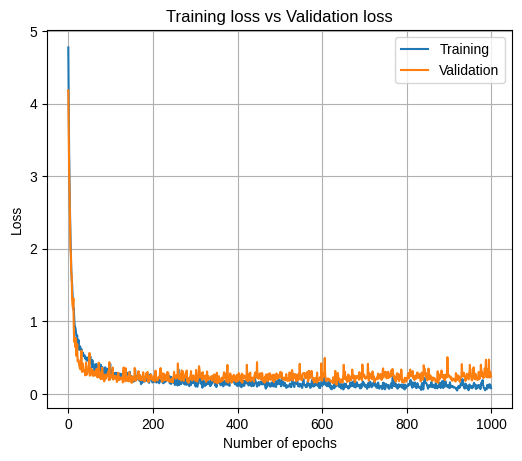

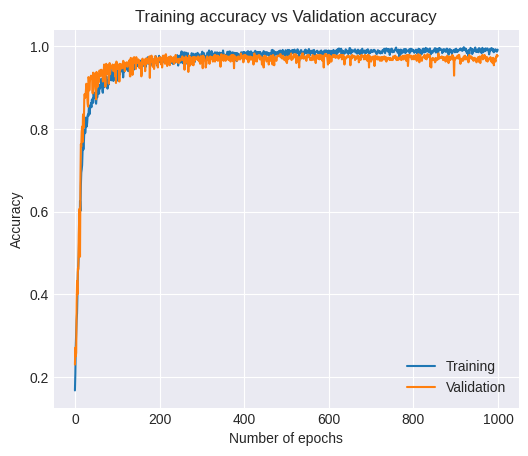

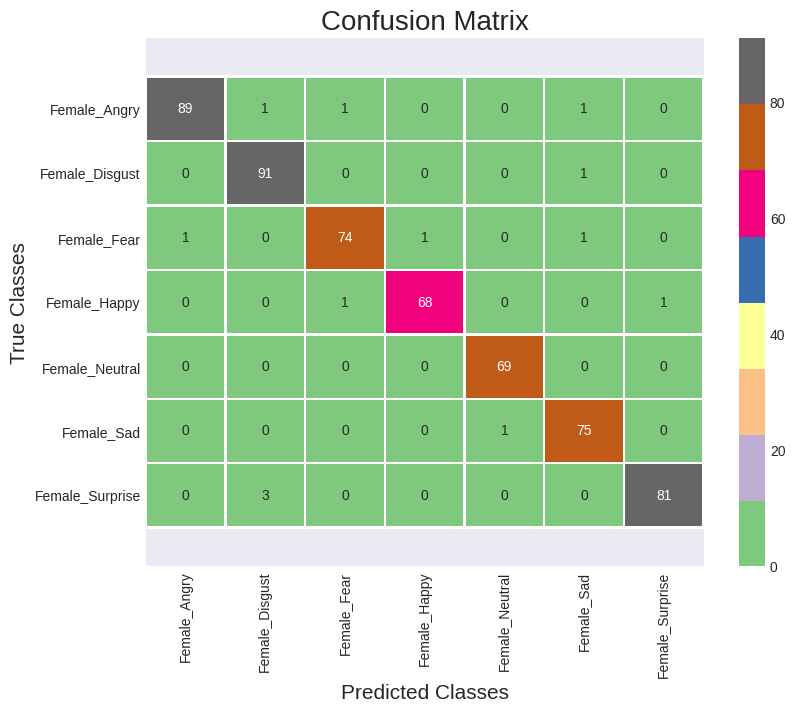

                 precision    recall  f1-score   support

   Female_Angry       0.99      0.97      0.98        92
 Female_Disgust       0.96      0.99      0.97        92
    Female_Fear       0.97      0.96      0.97        77
   Female_Happy       0.99      0.97      0.98        70
 Female_Neutral       0.99      1.00      0.99        69
     Female_Sad       0.96      0.99      0.97        76
Female_Surprise       0.99      0.96      0.98        84

       accuracy                           0.98       560
      macro avg       0.98      0.98      0.98       560
   weighted avg       0.98      0.98      0.98       560



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 100 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 100 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-SPECTROGRAM.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Female_Angry','Female_Disgust','Female_Fear','Female_Happy','Female_Neutral','Female_Sad','Female_Surprise']))  

In [25]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.LSTM(512))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(X_train, y_train,batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 155, 256)          2304      
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 74, 256)           0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 74, 256)           1024      
_________________________________________________________________
dropout_20 (Dropout)         (None, 74, 256)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 37, 256)          

18/18 [==============================] - 0s 7ms/step - loss: 0.5972 - accuracy: 0.9679
Loss of the model is -  0.597183346748352
18/18 [==============================] - 0s 7ms/step - loss: 0.5972 - accuracy: 0.9679
Accuracy of the model is -  96.78571224212646 %


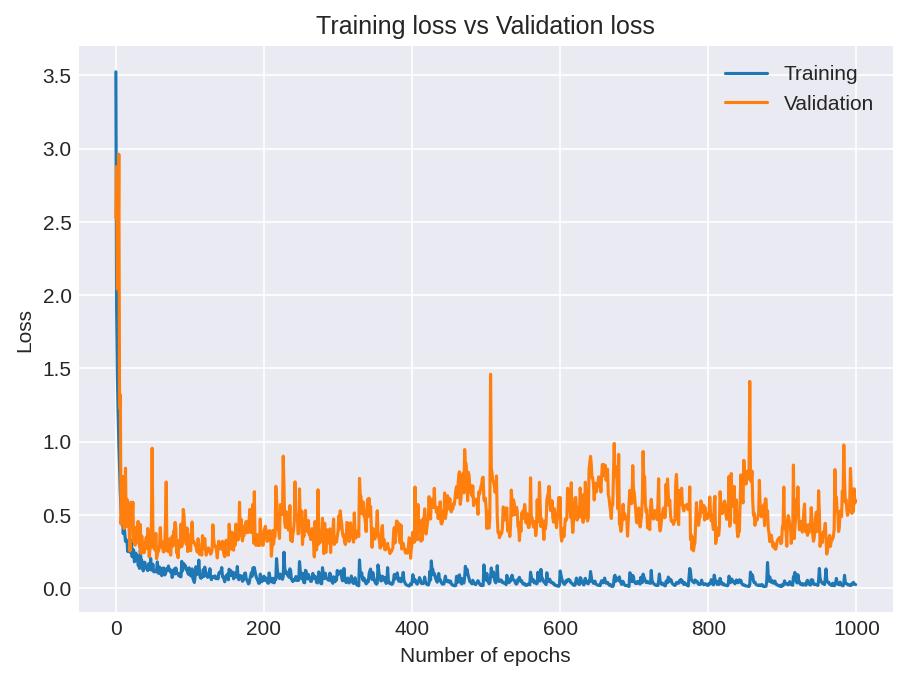

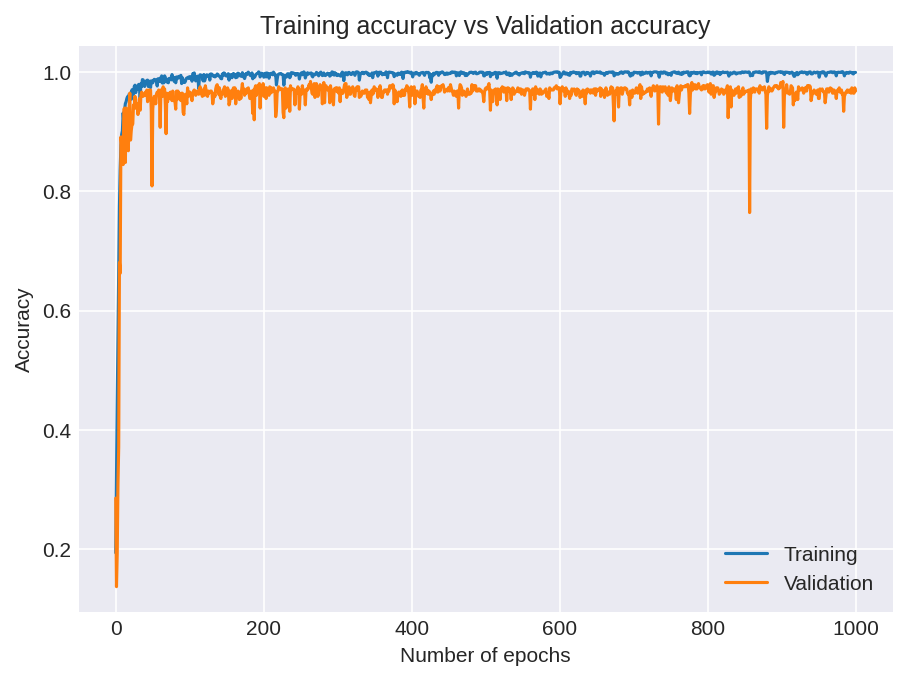

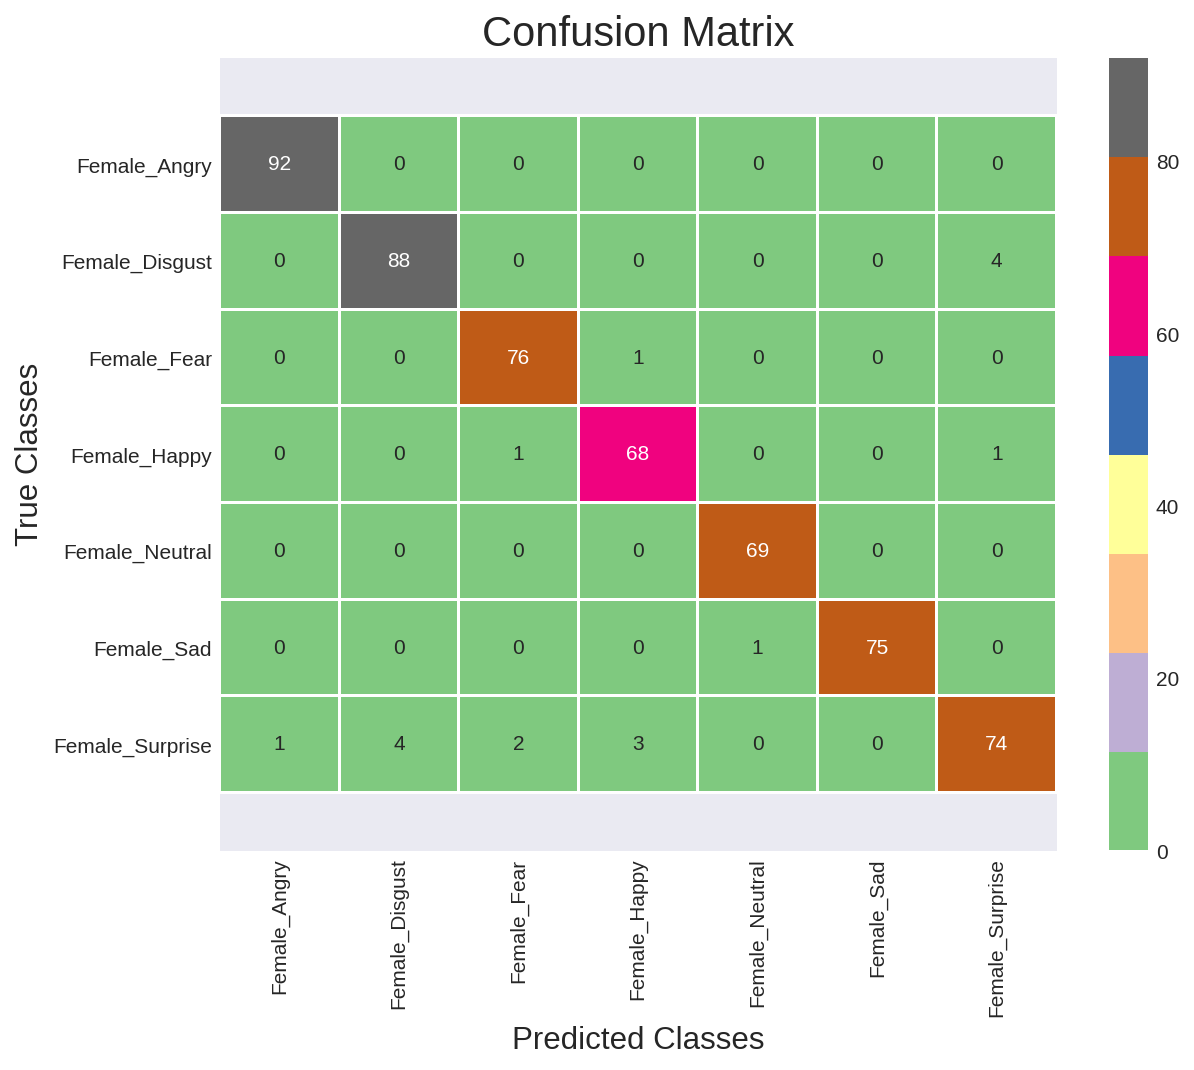

                 precision    recall  f1-score   support

   Female_Angry       0.99      1.00      0.99        92
 Female_Disgust       0.96      0.96      0.96        92
    Female_Fear       0.96      0.99      0.97        77
   Female_Happy       0.94      0.97      0.96        70
 Female_Neutral       0.99      1.00      0.99        69
     Female_Sad       1.00      0.99      0.99        76
Female_Surprise       0.94      0.88      0.91        84

       accuracy                           0.97       560
      macro avg       0.97      0.97      0.97       560
   weighted avg       0.97      0.97      0.97       560



In [28]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-SPECTROGRAM.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Female_Angry','Female_Disgust','Female_Fear','Female_Happy','Female_Neutral','Female_Sad','Female_Surprise']))  